<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>

## Adquisicion y preprocesamiento de datos - RafaC

### Giros
Operaciones muy útiles para preparar los dataframes antes de empezar a trabajar

### Índice
[Trasponer](#Trasponer)<br>
[pivot](#Pivot)<br>
[melt](#Melt)<br>
[pivot_table](#Pivot_table)<br>
[Agregaciones](#Agregaciones)<br>

<a name="Trasponer"></a>
## Trasponer

Tenemos datos del euro en excel y queremos hacer una gráfica de su evolución

In [5]:
#!pip install --upgrade xlrd # si da error la siguiente línea descomentar esto y ejecutar

     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 0.7.1
    Uninstalling xlrd-0.7.1:
      Successfully uninstalled xlrd-0.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camelot 12.6.29 requires xlrd==0.7.1, but you have xlrd 2.0.1 which is incompatible.


In [7]:
url = "https://github.com/RafaelCaballero/tdm/raw/master/datos/euro.xlsx"
import pandas as pd

df = pd.read_excel(url)
df

Dates  2008-07-11 00:00:00  2008-07-14 00:00:00  \
0           PX_OPEN               1.5712               1.5948   
1           PX_LAST               1.5938               1.5856   
2           PX_HIGH               1.5938               1.5971   
3            PX_LOW               1.5693               1.5842   
4         PX_VOLUME                  NaN                  NaN   
5  3MO_CALL_IMP_VOL                  NaN                  NaN   
6  6MO_CALL_IMP_VOL                  NaN                  NaN   

   2008-07-15 00:00:00  2008-07-16 00:00:00  2008-07-17 00:00:00  \
0               1.5857               1.6014               1.5938   
1               1.6015               1.5938               1.5850   
2               1.6038               1.6019               1.5939   
3               1.5844               1.5866               1.5801   
4                  NaN                  NaN                  NaN   
5                  NaN                  NaN                  NaN   
6                  NaN                  NaN                  NaN   

   2008-07-18 00:00:00  2008-07-21 00:00:00  2008-07-22 00:00:00  \
0               1.5850               1.5852               1.5887   
1               1.5847               1.5887               1.5911   
2               1.5894               1.5909               1.5942   
3               1.5783               1.5829               1.5832   
4                  NaN                  NaN                  NaN   
5                  NaN                  NaN                  NaN   
6                  NaN                  NaN                  NaN   

   2008-07-23 00:00:00  ...  2018-09-10 00:00:00  2018-09-11 00:00:00  \
0               1.5911  ...               1.1560               1.1577   
1               1.5734  ...               1.1577               1.1585   
2               1.5944  ...               1.1584               1.1644   
3               1.5719  ...               1.1526               1.1569   
4                  NaN  ...                  NaN                  NaN   
5                  NaN  ...                  NaN                  NaN   
6                  NaN  ...                  NaN                  NaN   

   2018-09-12 00:00:00  2018-09-13 00:00:00  2018-09-14 00:00:00  \
0               1.1585               1.1581               1.1620   
1               1.1580               1.1620               1.1625   
2               1.1613               1.1650               1.1722   
3               1.1566               1.1572               1.1614   
4                  NaN                  NaN                  NaN   
5                  NaN                  NaN                  NaN   
6                  NaN                  NaN                  NaN   

   2018-09-17 00:00:00  2018-09-18 00:00:00  2018-09-19 00:00:00  \
0               1.1623               1.1662               1.1683   
1               1.1662               1.1683               1.1690   
2               1.1664               1.1718               1.1724   
3               1.1618               1.1657               1.1652   
4                  NaN                  NaN                  NaN   
5                  NaN                  NaN                  NaN   
6                  NaN                  NaN                  NaN   

   2018-09-20 00:00:00  2018-09-21 00:00:00  
0               1.1690               1.1721  
1               1.1721               1.1743  
2               1.1721               1.1803  
3               1.1650               1.1715  
4                  NaN                  NaN  
5                  NaN                  NaN  
6                  NaN                  NaN  

[7 rows x 2662 columns]

Eliminamos las 3 últimas filas:


In [8]:
df2 = df.iloc[:-3,:]
df2

Dates  2008-07-11 00:00:00  2008-07-14 00:00:00  2008-07-15 00:00:00  \
0  PX_OPEN               1.5712               1.5948               1.5857   
1  PX_LAST               1.5938               1.5856               1.6015   
2  PX_HIGH               1.5938               1.5971               1.6038   
3   PX_LOW               1.5693               1.5842               1.5844   

   2008-07-16 00:00:00  2008-07-17 00:00:00  2008-07-18 00:00:00  \
0               1.6014               1.5938               1.5850   
1               1.5938               1.5850               1.5847   
2               1.6019               1.5939               1.5894   
3               1.5866               1.5801               1.5783   

   2008-07-21 00:00:00  2008-07-22 00:00:00  2008-07-23 00:00:00  ...  \
0               1.5852               1.5887               1.5911  ...   
1               1.5887               1.5911               1.5734  ...   
2               1.5909               1.5942               1.5944  ...   
3               1.5829               1.5832               1.5719  ...   

   2018-09-10 00:00:00  2018-09-11 00:00:00  2018-09-12 00:00:00  \
0               1.1560               1.1577               1.1585   
1               1.1577               1.1585               1.1580   
2               1.1584               1.1644               1.1613   
3               1.1526               1.1569               1.1566   

   2018-09-13 00:00:00  2018-09-14 00:00:00  2018-09-17 00:00:00  \
0               1.1581               1.1620               1.1623   
1               1.1620               1.1625               1.1662   
2               1.1650               1.1722               1.1664   
3               1.1572               1.1614               1.1618   

   2018-09-18 00:00:00  2018-09-19 00:00:00  2018-09-20 00:00:00  \
0               1.1662               1.1683               1.1690   
1               1.1683               1.1690               1.1721   
2               1.1718               1.1724               1.1721   
3               1.1657               1.1652               1.1650   

   2018-09-21 00:00:00  
0               1.1721  
1               1.1743  
2               1.1803  
3               1.1715  

[4 rows x 2662 columns]

Ahora tenemos un problema, queremos hacer una gráfica de PX_OPEN pero es una fila. Solución: trasponer

In [10]:
df3 = df2.T
df3

0        1        2       3
Dates                PX_OPEN  PX_LAST  PX_HIGH  PX_LOW
2008-07-11 00:00:00   1.5712   1.5938   1.5938  1.5693
2008-07-14 00:00:00   1.5948   1.5856   1.5971  1.5842
2008-07-15 00:00:00   1.5857   1.6015   1.6038  1.5844
2008-07-16 00:00:00   1.6014   1.5938   1.6019  1.5866
...                      ...      ...      ...     ...
2018-09-17 00:00:00   1.1623   1.1662   1.1664  1.1618
2018-09-18 00:00:00   1.1662   1.1683   1.1718  1.1657
2018-09-19 00:00:00   1.1683    1.169   1.1724  1.1652
2018-09-20 00:00:00    1.169   1.1721   1.1721   1.165
2018-09-21 00:00:00   1.1721   1.1743   1.1803  1.1715

[2662 rows x 4 columns]

In [12]:
df4 = df3.copy()
df4.columns = df3.loc["Dates"]
df4

Dates                PX_OPEN  PX_LAST  PX_HIGH  PX_LOW
Dates                PX_OPEN  PX_LAST  PX_HIGH  PX_LOW
2008-07-11 00:00:00   1.5712   1.5938   1.5938  1.5693
2008-07-14 00:00:00   1.5948   1.5856   1.5971  1.5842
2008-07-15 00:00:00   1.5857   1.6015   1.6038  1.5844
2008-07-16 00:00:00   1.6014   1.5938   1.6019  1.5866
...                      ...      ...      ...     ...
2018-09-17 00:00:00   1.1623   1.1662   1.1664  1.1618
2018-09-18 00:00:00   1.1662   1.1683   1.1718  1.1657
2018-09-19 00:00:00   1.1683    1.169   1.1724  1.1652
2018-09-20 00:00:00    1.169   1.1721   1.1721   1.165
2018-09-21 00:00:00   1.1721   1.1743   1.1803  1.1715

[2662 rows x 4 columns]

In [13]:
df5 = df4.iloc[1:,:]
df5

Dates      PX_OPEN PX_LAST PX_HIGH  PX_LOW
2008-07-11  1.5712  1.5938  1.5938  1.5693
2008-07-14  1.5948  1.5856  1.5971  1.5842
2008-07-15  1.5857  1.6015  1.6038  1.5844
2008-07-16  1.6014  1.5938  1.6019  1.5866
2008-07-17  1.5938   1.585  1.5939  1.5801
...            ...     ...     ...     ...
2018-09-17  1.1623  1.1662  1.1664  1.1618
2018-09-18  1.1662  1.1683  1.1718  1.1657
2018-09-19  1.1683   1.169  1.1724  1.1652
2018-09-20   1.169  1.1721  1.1721   1.165
2018-09-21  1.1721  1.1743  1.1803  1.1715

[2661 rows x 4 columns]

<AxesSubplot:>

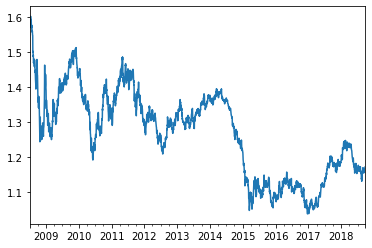

In [14]:
df5["PX_OPEN"].plot()

<a name="Pivot"></a>
## Pivot

3 parámetros relevantes

- columns: la columna (o columnas) cuyos valores serán las nuevas columnas
- values: columna con la que se rellenaran estos valores
- index: columna cuyo contenido pasará a ser el índice

<img src=https://pandas.pydata.org/docs/_images/reshaping_pivot.png width=400>

Tenemos datos de paro por comunidades:

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"
df = pd.read_csv(url,encoding="latin1")
df

Comunidad  Periodo  Total
0    Andalucía     2019  20.80
1    Andalucía     2018  21.26
2    Andalucía     2017  24.43
3    Andalucía     2016  28.25
4    Andalucía     2015  29.83
..         ...      ...    ...
337    Melilla     2006   9.86
338    Melilla     2005  12.33
339    Melilla     2004  12.49
340    Melilla     2003  19.88
341    Melilla     2002   3.57

[342 rows x 3 columns]

Nos gustaría hacer una gráfica para ver la evolución del paro por años en alguna comunidad concreta, pero para eso deberían ser columnas

In [16]:
df.T

0          1          2          3          4          5    \
Comunidad  Andalucía  Andalucía  Andalucía  Andalucía  Andalucía  Andalucía   
Periodo         2019       2018       2017       2016       2015       2014   
Total           20.8      21.26      24.43      28.25      29.83      34.23   

                 6          7          8          9    ...      332      333  \
Comunidad  Andalucía  Andalucía  Andalucía  Andalucía  ...  Melilla  Melilla   
Periodo         2013       2012       2011       2010  ...     2011     2010   
Total          36.26      35.71      31.01      28.04  ...    24.84    24.46   

               334      335      336      337      338      339      340  \
Comunidad  Melilla  Melilla  Melilla  Melilla  Melilla  Melilla  Melilla   
Periodo       2009     2008     2007     2006     2005     2004     2003   
Total        19.87    16.17    17.43     9.86    12.33    12.49    19.88   

               341  
Comunidad  Melilla  
Periodo       2002  
Total         3.57  

[3 rows x 342 columns]

No vale! no nos quedan los periodos como filas; lo que necesitamos es convertir Comunidad en columna sin afectar a las demás. Para esto podemos usar [pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)

In [7]:
df2 = df.pivot(index='Periodo', columns='Comunidad', values='Total')
df2

Comunidad  Andalucía  Aragón  Asturias  Balears. Illes  Canarias  Cantabria  \
Periodo                                                                       
2002           20.15    6.54     10.12            8.69     11.32      10.58   
2003           18.35    6.53     10.14           10.01     12.04      10.42   
2004           15.99    5.56     10.24            8.09     10.75      11.10   
2005           13.80    5.76      9.30            7.50     10.88       8.01   
2006           12.22    4.99      9.09            6.34     11.37       5.87   
2007           13.96    5.12      8.00            9.35     10.89       4.72   
2008           21.66    9.71     10.00           12.05     20.99       8.81   
2009           26.27   13.57     14.13           19.45     26.77      12.70   
2010           28.04   16.29     16.61           21.78     28.78      14.67   
2011           31.01   16.80     18.84           25.49     30.33      15.92   
2012           35.71   18.72     23.82           24.30     32.60      19.19   
2013           36.26   20.59     22.29           22.72     33.09      19.81   
2014           34.23   18.65     20.78           18.88     31.08      18.42   
2015           29.83   14.60     20.33           17.02     26.75      17.71   
2016           28.25   13.53     14.59           13.80     24.90      12.89   
2017           24.43   11.37     14.64           12.61     22.04      13.49   
2018           21.26   11.11     12.86           10.91     19.99       9.68   
2019           20.80    9.93     13.14            9.91     18.78      11.18   

Comunidad  Castilla - La Mancha  Castilla y León  Cataluña  Ceuta  \
Periodo                                                             
2002                       9.85            10.15     10.61   5.70   
2003                       9.80            11.02      9.72   9.65   
2004                      10.20            10.48      9.32   6.59   
2005                       9.42             8.53      6.63  17.14   
2006                       8.05             7.58      6.56  14.44   
2007                       8.10             6.94      6.50  20.18   
2008                      15.04            11.40     11.75  15.66   
2009                      19.29            14.21     16.90  24.01   
2010                      21.72            15.78     17.86  24.83   
2011                      24.53            17.21     20.40  27.19   
2012                      30.07            20.74     23.81  37.17   
2013                      28.99            22.02     21.87  36.78   
2014                      28.50            20.28     19.88  32.46   
2015                      24.97            17.58     17.73  23.25   
2016                      22.14            14.81     14.85  22.39   
2017                      19.74            13.71     12.63  26.03   
2018                      16.16            11.21     11.75  24.02   
2019                      16.56            11.20     10.45  27.58   

Comunidad  Comunitat Valenciana  Extremadura  Galicia  La Rioja  Madrid  \
Periodo                                                                   
2002                      10.71        18.91    11.89      5.65    6.99   
2003                      10.68        17.14    13.46      6.75    7.16   
2004                      10.11        17.65    12.47      4.68    6.95   
2005                       8.13        15.16     9.14      6.69    5.90   
2006                       8.48        12.94     7.88      6.88    6.46   
2007                       8.94        14.79     7.46      5.88    6.40   
2008                      14.58        18.11     9.64      9.80   10.02   
2009                      22.09        21.21    12.80     13.76   14.48   
2010                      22.57        23.95    15.62     15.58   15.54   
2011                      24.83        28.33    18.17     18.61   17.96   
2012                      27.62        33.97    21.13     18.82   19.32   
2013                      27.15        32.40    21.88     20.24

<AxesSubplot:xlabel='Periodo'>

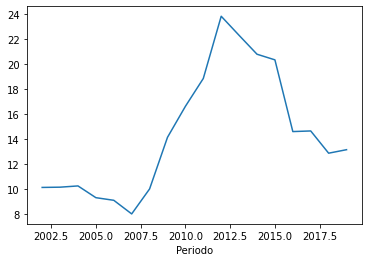

In [34]:
df2["Asturias"].plot()

**Pregunta** ¿Qué hará el código siguiente?

In [5]:
#df.pivot(index='Comunidad', columns='Periodo', values='Total')

<a name="Melt"></a>
## Melt

[melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) es la función contraria, la que pasa del formato ancho al formato largo

En esta ocasión se indican las columnas que no hay que tocar, las que hacen de "clave primaria":

<img src="https://miro.medium.com/max/1400/0*O3SGf68-vlON_H8L.png" width=400>

In [8]:
df2

Comunidad  Andalucía  Aragón  Asturias  Balears. Illes  Canarias  Cantabria  \
Periodo                                                                       
2002           20.15    6.54     10.12            8.69     11.32      10.58   
2003           18.35    6.53     10.14           10.01     12.04      10.42   
2004           15.99    5.56     10.24            8.09     10.75      11.10   
2005           13.80    5.76      9.30            7.50     10.88       8.01   
2006           12.22    4.99      9.09            6.34     11.37       5.87   
2007           13.96    5.12      8.00            9.35     10.89       4.72   
2008           21.66    9.71     10.00           12.05     20.99       8.81   
2009           26.27   13.57     14.13           19.45     26.77      12.70   
2010           28.04   16.29     16.61           21.78     28.78      14.67   
2011           31.01   16.80     18.84           25.49     30.33      15.92   
2012           35.71   18.72     23.82           24.30     32.60      19.19   
2013           36.26   20.59     22.29           22.72     33.09      19.81   
2014           34.23   18.65     20.78           18.88     31.08      18.42   
2015           29.83   14.60     20.33           17.02     26.75      17.71   
2016           28.25   13.53     14.59           13.80     24.90      12.89   
2017           24.43   11.37     14.64           12.61     22.04      13.49   
2018           21.26   11.11     12.86           10.91     19.99       9.68   
2019           20.80    9.93     13.14            9.91     18.78      11.18   

Comunidad  Castilla - La Mancha  Castilla y León  Cataluña  Ceuta  \
Periodo                                                             
2002                       9.85            10.15     10.61   5.70   
2003                       9.80            11.02      9.72   9.65   
2004                      10.20            10.48      9.32   6.59   
2005                       9.42             8.53      6.63  17.14   
2006                       8.05             7.58      6.56  14.44   
2007                       8.10             6.94      6.50  20.18   
2008                      15.04            11.40     11.75  15.66   
2009                      19.29            14.21     16.90  24.01   
2010                      21.72            15.78     17.86  24.83   
2011                      24.53            17.21     20.40  27.19   
2012                      30.07            20.74     23.81  37.17   
2013                      28.99            22.02     21.87  36.78   
2014                      28.50            20.28     19.88  32.46   
2015                      24.97            17.58     17.73  23.25   
2016                      22.14            14.81     14.85  22.39   
2017                      19.74            13.71     12.63  26.03   
2018                      16.16            11.21     11.75  24.02   
2019                      16.56            11.20     10.45  27.58   

Comunidad  Comunitat Valenciana  Extremadura  Galicia  La Rioja  Madrid  \
Periodo                                                                   
2002                      10.71        18.91    11.89      5.65    6.99   
2003                      10.68        17.14    13.46      6.75    7.16   
2004                      10.11        17.65    12.47      4.68    6.95   
2005                       8.13        15.16     9.14      6.69    5.90   
2006                       8.48        12.94     7.88      6.88    6.46   
2007                       8.94        14.79     7.46      5.88    6.40   
2008                      14.58        18.11     9.64      9.80   10.02   
2009                      22.09        21.21    12.80     13.76   14.48   
2010                      22.57        23.95    15.62     15.58   15.54   
2011                      24.83        28.33    18.17     18.61   17.96   
2012                      27.62        33.97    21.13     18.82   19.32   
2013                      27.15        32.40    21.88     20.24

In [36]:
df2.melt()

Comunidad  value
0     Andalucía  20.15
1     Andalucía  18.35
2     Andalucía  15.99
3     Andalucía  13.80
4     Andalucía  12.22
..          ...    ...
337  País Vasco  12.89
338  País Vasco  12.27
339  País Vasco  10.57
340  País Vasco   9.58
341  País Vasco   9.09

[342 rows x 2 columns]

In [37]:
df2.melt(ignore_index=False)

Comunidad  value
Periodo                   
2002      Andalucía  20.15
2003      Andalucía  18.35
2004      Andalucía  15.99
2005      Andalucía  13.80
2006      Andalucía  12.22
...             ...    ...
2015     País Vasco  12.89
2016     País Vasco  12.27
2017     País Vasco  10.57
2018     País Vasco   9.58
2019     País Vasco   9.09

[342 rows x 2 columns]

<a name="Pivot_table"></a>
## pivot_table

[pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) Añade una función de agregación a pivot.

In [38]:
stocks = pd.read_csv('https://gist.githubusercontent.com/alexdebrie/b3f40efc3dd7664df5a20f5eee85e854/raw/ee3e6feccba2464cbbc2e185fb17961c53d2a7f5/stocks.csv')
stocks

date symbol     open     high      low    close    volume
0   2019-03-01   AMZN  1655.13  1674.26  1651.00  1671.73   4974877
1   2019-03-04   AMZN  1685.00  1709.43  1674.36  1696.17   6167358
2   2019-03-05   AMZN  1702.95  1707.80  1689.01  1692.43   3681522
3   2019-03-06   AMZN  1695.97  1697.75  1668.28  1668.95   3996001
4   2019-03-07   AMZN  1667.37  1669.75  1620.51  1625.95   4957017
5   2019-03-01   AAPL   174.28   175.15   172.89   174.97  25886167
6   2019-03-04   AAPL   175.69   177.75   173.97   175.85  27436203
7   2019-03-05   AAPL   175.94   176.00   174.54   175.53  19737419
8   2019-03-06   AAPL   174.67   175.49   173.94   174.52  20810384
9   2019-03-07   AAPL   173.87   174.44   172.02   172.50  24796374
10  2019-03-01   GOOG  1124.90  1142.97  1124.75  1140.99   1450316
11  2019-03-04   GOOG  1146.99  1158.28  1130.69  1147.80   1446047
12  2019-03-05   GOOG  1150.06  1169.61  1146.19  1162.03   1443174
13  2019-03-06   GOOG  1162.49  1167.57  1155.49  1157.86   1099289
14  2019-03-07   GOOG  1155.72  1156.76  1134.91  1143.30   1166559

Vamos a convertir la columna `symbol`en 3, una para cada uno de sus valores

In [45]:
stocks.pivot(index='date', columns='symbol', values='volume')

symbol          AAPL     AMZN     GOOG
date                                  
2019-03-01  25886167  4974877  1450316
2019-03-04  27436203  6167358  1446047
2019-03-05  19737419  3681522  1443174
2019-03-06  20810384  3996001  1099289
2019-03-07  24796374  4957017  1166559

In [48]:
df_symbol = stocks.pivot(index='date', columns='symbol', values='volume')
df_symbol

symbol          AAPL     AMZN     GOOG
date                                  
2019-03-01  25886167  4974877  1450316
2019-03-04  27436203  6167358  1446047
2019-03-05  19737419  3681522  1443174
2019-03-06  20810384  3996001  1099289
2019-03-07  24796374  4957017  1166559

In [49]:
df_symbol.columns

Index(['AAPL', 'AMZN', 'GOOG'], dtype='object', name='symbol')

In [50]:
stocks.pivot(index='date', columns='symbol', values=['high','volume'])

high                        volume                      
symbol        AAPL     AMZN     GOOG        AAPL       AMZN       GOOG
date                                                                  
2019-03-01  175.15  1674.26  1142.97  25886167.0  4974877.0  1450316.0
2019-03-04  177.75  1709.43  1158.28  27436203.0  6167358.0  1446047.0
2019-03-05  176.00  1707.80  1169.61  19737419.0  3681522.0  1443174.0
2019-03-06  175.49  1697.75  1167.57  20810384.0  3996001.0  1099289.0
2019-03-07  174.44  1669.75  1156.76  24796374.0  4957017.0  1166559.0

In [39]:
stocks.pivot(index='symbol', columns='date', values='volume')

date    2019-03-01  2019-03-04  2019-03-05  2019-03-06  2019-03-07
symbol                                                            
AAPL      25886167    27436203    19737419    20810384    24796374
AMZN       4974877     6167358     3681522     3996001     4957017
GOOG       1450316     1446047     1443174     1099289     1166559

Total de volumen para cada valor

In [43]:
import numpy as np
stocks.pivot_table(index='symbol', values='volume', aggfunc=np.sum)

volume
symbol           
AAPL    118666547
AMZN     23776775
GOOG      6605385

**Ejemplo** Consideramos el fichero

In [11]:
import pandas as pd
url = "https://github.com/RafaelCaballero/tdm/raw/master/datos/clientes.xlsx"
df = pd.read_excel(url)
df

cliente  documento  entregado  tasas
0    2910167    1687488          0    464
1    5799708     152861          0    112
2    7248498    1789308          0    730
3    5799708    1082327          0    621
4    6989459    1537165          0    496
..       ...        ...        ...    ...
495  3515207     206323          0    811
496  6945307    1007147          1    998
497  2910167    1303799          1    876
498  5651729     955457          0    622
499  2910167     529050          1    554

[500 rows x 4 columns]

Queremos el total de tasas por cliente desglosadas en dos columnas, una para entregado=1 y otra para entregado=0

<a name="Agregaciones"></a>
## Agregados

Ya sabemos que se pueden utilizar funciones de agregación por columnas

<table>
<thead><tr><th>Function</th><th>Description</th></tr></thead><tbody><tr><td>count</td><td>Number of non-null observations</td></tr><tr><td>sum</td><td>Sum of values</td></tr><tr><td>mean</td><td>Mean of values</td></tr><tr><td>mad</td><td>Mean absolute deviation</td></tr><tr><td>median</td><td>Arithmetic median of values</td></tr><tr><td>min</td><td>Minimum</td></tr><tr><td>max</td><td>Maximum</td></tr><tr><td>mode</td><td>Mode</td></tr><tr><td>abs</td><td>Absolute Value</td></tr><tr><td>prod</td><td>Product of values</td></tr><tr><td>std</td><td>Unbiased standard deviation</td></tr><tr><td>var</td><td>Unbiased variance</td></tr><tr><td>sem</td><td>Unbiased standard error of the mean</td></tr><tr><td>skew</td><td>Unbiased skewness (3rd moment)</td></tr><tr><td>kurt</td><td>Unbiased kurtosis (4th moment)</td></tr><tr><td>quantile</td><td>Sample quantile (value at %)</td></tr><tr><td>cumsum</td><td>Cumulative sum</td></tr><tr><td>cumprod</td><td>Cumulative product</td></tr><tr><td>cummax</td><td>Cumulative maximum</td></tr><tr><td>cummin</td><td>Cumulative minimum</td></tr></tbody>
</table>



In [ ]:
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/valores.csv"
df = pd.read_csv(url)
df

In [ ]:
df.INDU_Index_High.max(), df.INDU_Index_High.min()

Sin embargo en otras ocasiones nos hará falta calcular estos datos por grupos. El siguiente ejemplo tiene datos de tweets de las elecciones USA2020 para varios usuarios, incluyendo el "sentimiento" que expresa el tweet sobre el candidato Biden (B) y Trump (T)

In [ ]:
import pandas as pd
url = "https://github.com/RafaelCaballero/tdm/blob/master/datos/todousa2020_users.xlsx?raw=true"

df = pd.read_excel(url)
df

Para cada `userid` queremos saber la opinión media de estos usuarios para los dos candidatos (B) y (T).

Esto se hace en dos fases:

- Primero se agrupa con group by

In [ ]:
df_userid = df.groupby('userid')
df_userid



Ahora se hacen las operaciones que se deseen sobre los grupos creados

In [ ]:
df_user = df_userid.agg(
      t_media=('T', 'mean'),
      b_media=('B', 'mean')
)
df_user

**Ejercicio** Ahora queremos saber en el fichero 

https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/vote_intention.csv

que contiene datos de encuestas, la edad media de los votantes de cada partido (el voto es vote_r y la edad age)